# Coursework 1 - Decision Trees Learning

### Enter your candidate number here: 086696

In this coursework you will explore the classification and regression capabilities of one of the most used machine learning techniques, namely **Decision Trees**. 

Decision tree learning is one of the most widely used and practical methods for inductive inference. Moreover, decision trees are extremely useful in a sense that the acquired knowledge can be easily interpreted by a human being, allowing for us to understand and perhaps learn from it.

## Decision trees
Decision trees are a high-level representation of a sequence of *yes/no* regarding a set of evidences that can lead to a conclusion about an event.

For instance, let us suppose that you want to decide whether or not you should play tennis in a given summer day. Based on your past experiences and how the weather was on that day, you collected the following data:

In [2]:
import pandas as pd
names = ['Outlook','Temperature','Humidity','Wind','Good?']
tennis_train = pd.read_csv("tennis-train.txt",
                     sep=' ',# In the file, attributes are separated by white spaces
                     names=names)

In [3]:
tennis_train.head(10)

,Outlook,Temperature,Humidity,Wind,Good?
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
attrs = names[:-1]
label = names[-1:]
X_train = tennis_train[attrs]
y_train = tennis_train[label]

In [5]:
X_train.head()

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak


In [6]:
y_train.head()

,Good?
0,No
1,No
2,Yes
3,Yes
4,Yes


## Pre-processing
Before you train the moodel, you might want to convert the *nominal* variables to *numerical* ones.
For such, you can use the `LabelEncoder` class from the `sklearn.preprocessing` module. 
For instance:

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
fruits = ['apple','orange','apple','lemon','orange','banana']
lb = LabelEncoder()
lb.fit_transform(fruits)

array([0, 3, 0, 2, 3, 1], dtype=int64)

You will use the `DecisionTreeClassifier` and the `DecisionTreeRegressor` classes from  the `sklearn.tree` module to complete the following tasks:

## The assignment
 For each of the following experiments, provide the code and generated outputs.
  1. For the `Tennis` dataset, provide the accuracy on the **training** and **test** sets;
  2. For the `Iris` dataset, provide the accuracy on the **training** and **test** sets;
  3. Compare the accuracies of each experiment above when you change the criterion from 'gini' to 'entropy'.
  4. From the `Iris` dataset, you will generate *noisy* versions of the original dataset by randomly changing from the correct class label to wrong ones from 0%-30% of the **training** instances (in increments of 2%)** and plot the output of the accuracies obtained from the (uncorrupted) **test** data for each noise level.  The x-axis should be the noisy level(0-30%) and the y-axis the accuracy.
  5. Hos does increasing the paramenter `min_samples_leaf` (e.g., from 1 to 2,3...) affect the accuracy on the  test set from the noisy iris experiment? You should generate plots with multiple lines, each of them corresponding to one value of `min_samples_leaf`. 
 

In [9]:
# Load libraries
import pandas as pd 
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder to make data numeric
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier Object
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics used for calculating the accuracy

from numpy import arange # Import arange for iterating through noise levels
from random import random, seed, randint, choice # Import for creating noise

# To create visual representation of the decision tree
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image
import pydotplus
import copy

# To plot graphs to display results
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def calculate_accuracy(train_file, test_file, col_names, criterion="gini", 
                       start_noise=0.0, end_noise=0.0, increment=1.0, 
                       min_samples_leaf=1, n=1):
    """
    Finds the accuracy of decision tree from a training set, and testing set file

    Parameters:
        train_file (Str): Csv file containing the training data
        
        test_file (Str): Csv file containing the training data
        
        col_names ([Str]): The headers of each column in the data file
        
        criterion (Str): Method used to build tree
        
        start_noise (float): % of starting noise
        
        end_noise (float): % of ending noise
        
        increment (float): % for step size
        
        min_samples_leaf (Int): How many to sample at each branch
        
        n (int): How many iterations to complete for each noise level

    Returns:
        accuracies ([float]): The computed average accuracies for each noise level
        
        occurrences ({float, Int}): The calculated accuracy and how many times it has occurred
        
        classifier (sklearn.Tree.DecisionTreeClassifier): The model made from the two input files
   `"""
    # Read in the training file to a dataframe
    data_train = pd.read_csv(train_file,
                     sep=' ', # In the file, attributes are separated by white spaces
                     names=col_names)
    
    # Read in the testing file to a dataframe
    data_test = pd.read_csv(test_file,
                         sep=' ', # In the file, attributes are seperated by white spaces
                         names=col_names)
    
    # Transform the data to numerical values
    lb = LabelEncoder()
    for name in col_names:
        data_train[name] = lb.fit_transform(data_train[name])
        data_test[name] = lb.fit_transform(data_test[name])
    
    # Create lists for attributes and class labels
    attrs = col_names[:-1]
    label = col_names[-1:]
    
    # Create Decision Tree classifer object
    classifier = DecisionTreeClassifier(criterion=criterion, min_samples_leaf=min_samples_leaf)
    
    accuracies = []
    occurrences_dict = {}
    
    # Iterate through each noise level
    for noise_level in arange(start_noise, end_noise + increment, increment):
        mean_total = 0
        for _ in range(n):
            data_noise = data_train.copy()
            switch_set = data_noise.sample(frac=noise_level, replace=False)
            data_noise = data_noise.drop(switch_set.index)
            
            for i, row in switch_set.iterrows():
                iris_change = randint(0,2)
                while iris_change == row['Iris']:
                    iris_change = randint(0,2)
                switch_set.at[i, 'Iris'] = iris_change
            
            data_noise = data_noise.append(switch_set, ignore_index=True)
            data_noise.reset_index(drop=True, inplace=True)
            
            X_train = data_noise[attrs]
            y_train = data_noise[label]
            X_test = data_test[attrs]
            y_test = data_test[label]
            
            classifier = classifier.fit(X_train, y_train)
            accuracy = classifier.score(X_test, y_test)*100
            mean_total += accuracy
            occurrences_dict.setdefault(accuracy, 0) # Add accuracy as key and set value to 0
            occurrences_dict[accuracy] += 1
        accuracies.append(mean_total/n)
    return accuracies, occurrences_dict, classifier

def display_tree(decision_tree, attrs, class_names):
    """
    Creates a visual representation of the decision tree
    
    Parameters:
        decision_tree (sklearn.Tree.DecisionTreeClassifier): Tree to create visual representation from
        
        attrs ([Str]]): The attributes represented in the decision tree classifier
    
    Returns:
        graph (pydotplus.graphviz): A pydotplus graph representing the decision tree
    """
    dot_data = StringIO()
    export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = attrs,class_names=class_names)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return graph

# Question 1
Firstly, I have calculated the accuracy of the decision tree by training it using tennis-train.txt and then testing it with tennis-train.txt in order to confirm a 100% accuracy rating. This is what the first accuracy displays. 

In [11]:
tennis_col_names = ['Outlook','Temperature','Humidity','Wind','Good?']
tennis_train, tennis_test = "tennis-train.txt", "tennis-test.txt"
accuracy, occurences, clf = calculate_accuracy(tennis_train, tennis_train, tennis_col_names, n=100)
print("Accuracy:", *accuracy)

Accuracy: 100.0


Secondly, I trained the decision tree using tennis-train.txt and then I applied tennis-test.txt to find the tree's accuracy rating. This is the number displayed. I have also produced a visual representation of what the decision tree looks like.

Accuracy: 75.0


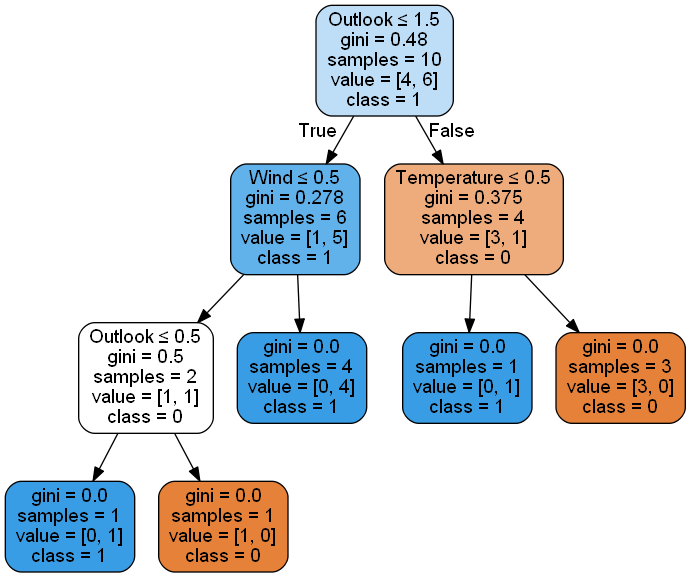

In [33]:
accuracy, occurences, clf = calculate_accuracy(tennis_train, tennis_test, tennis_col_names)
print("Accuracy:", accuracy[0])
class_names = ['0','1'] # Class labels used by Label Encoder
Image(display_tree(clf, tennis_col_names[:-1], class_names).create_png()) # Display Graphic as a png

Next I have run the accuracy calculation n=100 times to find the most common accuracies.

In [13]:
n = 1000 # Number of accuraies to calculate
accuracy, occurrences, clf = calculate_accuracy(tennis_train, tennis_test, tennis_col_names, n=n)

for score, count in occurrences.items():
    print("Accuracy: {} Occurences: {} Percentage: {}".format(score, count, count*100/n))

Accuracy: 75.0 Occurences: 493 Percentage: 49.3
Accuracy: 100.0 Occurences: 507 Percentage: 50.7


Above, on each row, I am displaying the accuracy, how many times that accuracy occurred, and the percentage out of n of which that accuracy occurred. The results show a near 50/50 split between the accuracy being 75% and 100%.

# Question 2
Firstly, I have calculated the accuracy of the decision tree by training it using iris-train.txt and then testing it with iris-train.txt in order to confirm a 100% accuracy rating. This is what the first accuracy displays. 

In [14]:
iris_col_names = ['sepal-length','sepal-width','petal-length','petal-width','Iris']
iris_train, iris_test = "iris-train.txt", "iris-test.txt"
accuracy, occurrences, clf = calculate_accuracy(iris_train, iris_train, iris_col_names, n=100)
print("Accuracy: ", *accuracy)

Accuracy:  100.0


Secondly, I trained the decision tree using iris-train.txt and then I applied iris-test.txt to find the tree's accuracy rating. This is the number displayed. I have also produced a visual representation of what the decision tree looks like.

Accuracy:  84.0


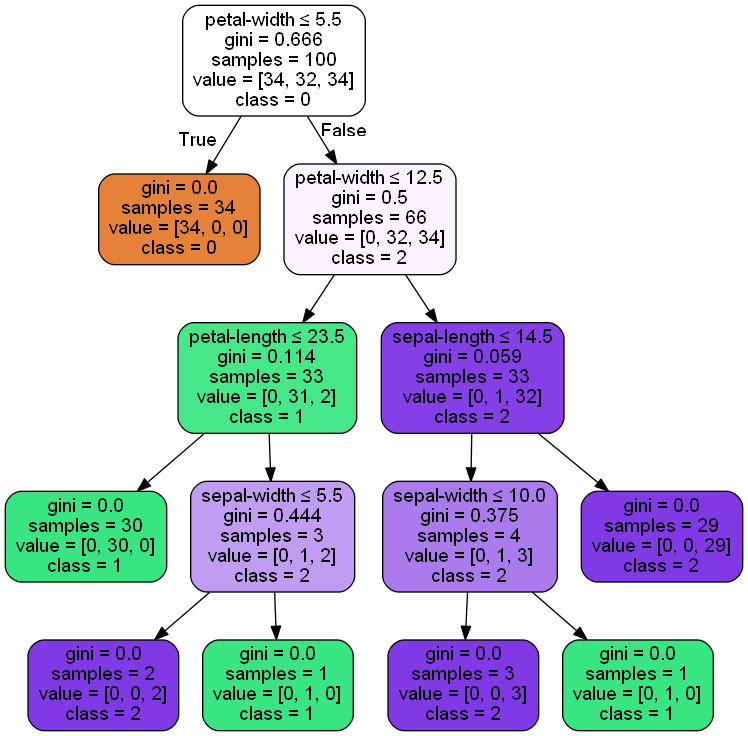

In [15]:
accuracy, occurrences, clf = calculate_accuracy(iris_train, iris_test, iris_col_names)
print("Accuracy: ", accuracy[0])
class_names = ['0','1', '2']
Image(display_tree(clf, iris_col_names[:-1], class_names).create_png())

Next I have run the accuracy calculation n=100 times to find the most common accuracies

In [16]:
n = 1000 # Number of accuracies to calculate
accuracy, occurrences, clf = calculate_accuracy(iris_train, iris_test, iris_col_names, n=n)

for score, count in occurrences.items():
    print("Accuracy: {} Occurences: {} Percentage: {}".format(score, count, count*100/n))

Accuracy: 84.0 Occurences: 495 Percentage: 49.5
Accuracy: 76.0 Occurences: 505 Percentage: 50.5


Above, on each row, I am displaying the accuracy, how many times that accuracy occurred, and the percentage out of n of which that accuracy occurred. The results show a near 50/50 split between the accuracy being 76% and 84%.

# Question 3
Here, I have changed the measure of quality of a split from using the gini function, to instead use the entropy function. Next, I have calculated the accuracy for both the tennis and iris data sets n=1000 times using both the gini and entropy functions in order to draw comparisons between the average accuracy when each is used. I have done this for both the training and test sets.

In [17]:
n = 10000 # Number of times to calculate each accuracy

# Find tennis accuracies for training and test sets
gini_tennis_train = calculate_accuracy(tennis_train, tennis_train, tennis_col_names, criterion="gini", n=n)
entropy_tennis_train = calculate_accuracy(tennis_train, tennis_train, tennis_col_names, criterion="entropy", n=n)
gini_tennis_test = calculate_accuracy(tennis_train, tennis_test, tennis_col_names, criterion="gini", n=n)
entropy_tennis_test = calculate_accuracy(tennis_train, tennis_test, tennis_col_names, criterion="entropy", n=n)

# Display Results
print("***Average Tennis Entropy vs Gini Accuracy***")
print("Training Set Accuracies - Entropy: {} Gini: {}".format(*entropy_tennis_train[0], *gini_tennis_train[0]))
print("Testing Set Accuracies - Entropy: {} Gini: {}".format(*entropy_tennis_test[0], *gini_tennis_test[0]))

***Average Tennis Entropy vs Gini Accuracy***
Training Set Accuracies - Entropy: 100.0 Gini: 100.0
Testing Set Accuracies - Entropy: 87.225 Gini: 87.6875


In [18]:
n = 10000 # Number of times to calculate each accuracy

# Find gini accuracies for training and test sets
gini_iris_train = calculate_accuracy(iris_train, iris_train, iris_col_names, criterion="gini", n=n)
entropy_iris_train = calculate_accuracy(iris_train, iris_train, iris_col_names, criterion="entropy", n=n)
gini_iris_test = calculate_accuracy(iris_train, iris_test, iris_col_names, criterion="gini", n=n)
entropy_iris_test = calculate_accuracy(iris_train, iris_test, iris_col_names, criterion="entropy", n=n)

# Display Results
print("***Average Iris Entropy vs Gini Accuracy***")
print("Training Set Accuracies - Entropy: {} Gini: {}".format(*entropy_iris_train[0], *gini_iris_train[0]))
print("Testing Set Accuracies - Entropy: {} Gini: {}".format(*entropy_iris_test[0], *gini_iris_test[0]))

***Average Iris Entropy vs Gini Accuracy***
Training Set Accuracies - Entropy: 100.0 Gini: 100.0
Testing Set Accuracies - Entropy: 79.98 Gini: 79.9832


The results show that there is very little difference in accuracies whether you are using gini or entropy as the criterion. Entropy can be seen to be less than 0.5% less accurate for both datasets but I consider this to be neligible. It could instead be worth considering the performance differences between the two when it comes to choosing which criterion to use seeing as any difference in accuracy is too minimal to affect the overall results.

# Question 4
I have created noisy versions of the iris data set by changing a percentage of the class labels to wrong ones. I have then calculated the mean average accuracy against each noise with n iterations. The graphs below show how increasing the number of iterations affects the trend.

In [27]:
def noise_graph(n):
    """
    Plots a graph of showing how increasing noise levels affects the accuracy of a decision tree classifier
    
    Parameters:
        n (Int): The number of iterations to perform at each noise level
        
    Returns:
        Nothing
    """
    START_NOISE = 0.0
    END_NOISE = 0.3
    INCREMENT = 0.02
    noise_accuracies = []

    average_noise_accuracy, occurrences, clf = calculate_accuracy("iris-train.txt", "iris-test.txt", iris_col_names,
                                        start_noise=START_NOISE, end_noise=END_NOISE, increment=INCREMENT, n=n)

    plt.figure(figsize=(14,8))
    plt.plot(arange(START_NOISE, (END_NOISE + INCREMENT)*100, INCREMENT*100), average_noise_accuracy, 'ro--') # Plot the noise level against the accuracy
    plt.ylabel('Accuracy (%)')
    plt.xlabel('Noise Level (%)')
    plt.title('Accuracy vs Noise')
    plt.show()

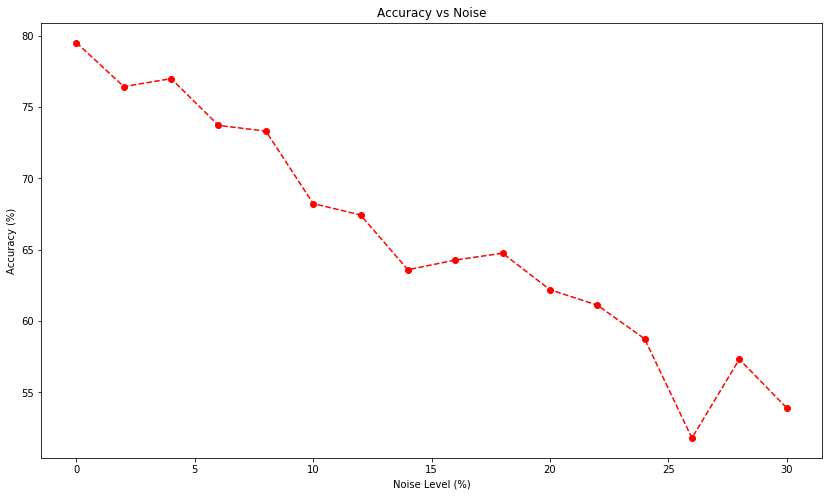

In [28]:
noise_graph(50)

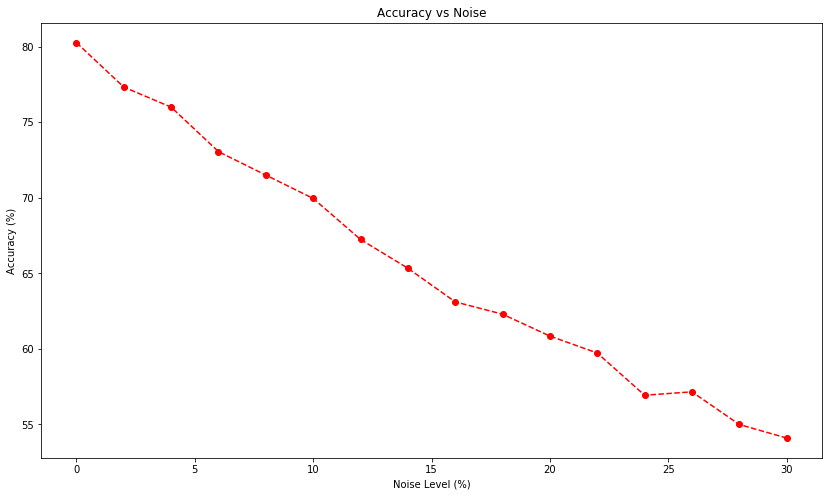

In [29]:
noise_graph(250)

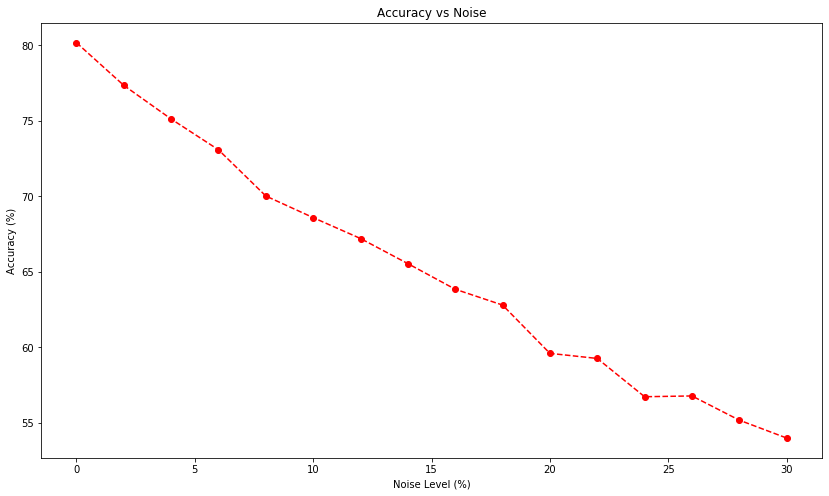

In [30]:
noise_graph(500)

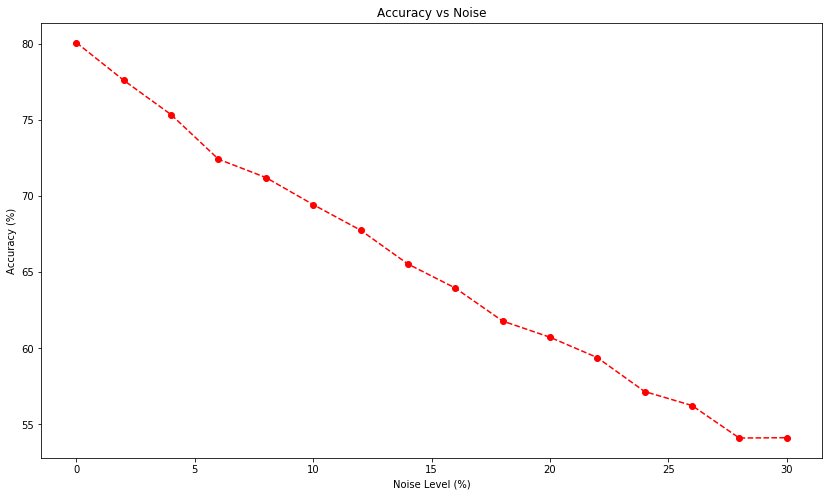

In [31]:
noise_graph(1000)

The above results show that adding noise to class labels leads to a clear negative correlation. As the noise levels increase the accuracy drops at a consistent rate. Increasing the number of iterations leads to the smoothing of this line. The results do show that the decision tree classifier is fairly robust to noise as the accuracy only drops below 65% at a 15% noise rate and at the maximum 30% noise, the classifier is still accurate over half the time.

# Question 5
I have performed an experiment here to see how changing the min_samples_leaf parameter affects the accuracy when noise is applied. This parameter changes the minimum number of samples required to be at a leaf node. This means the tree will not split unless there is min_samples_leaf or more training samples in both the left and right branches. The predicted effect of this is that it should smooth the model. I have plotted five lines with the parameter min_samples_leaf being 1..5 to see how this affects the accuracy. I have run each value of min_samples_leaf n=1000 times and obtained the average accuracy for each noise level in order to improve my results. The output of this is plotted in the graph below.

In [24]:
def change_min_samples(min_samples_start=1, min_samples_end=5, n=100, increase_samples=1):
    """
    Plots a graph showing how changing the value of the parameter min_samples_leaf 
    affects the accuracy of the classifier at each noise level
    
    Parameters:
        min_samples_start (Int): Starting loop value for min_samples_leaf
        
        min_samples_end (Int): Ending loop value for min_samples_leaf
        
        n (Int): The number of iterations for each noise level
        
        increase_samples (Int): The number to increment min_samples_leaf by each iteration
    
    Returns:
        Nothing
    """
    START_NOISE = 0.0
    END_NOISE = 0.3
    INCREMENT = 0.02
    min_samples_accuracy = []

    for min_samples_leaf in range(min_samples_start,min_samples_end+increase_samples, increase_samples):
        accuracies, occurrences, cf = calculate_accuracy("iris-train.txt", "iris-test.txt", iris_col_names,
                                       start_noise=START_NOISE, end_noise=END_NOISE, increment=INCREMENT, 
                                       min_samples_leaf=min_samples_leaf, n=n)
        min_samples_accuracy.append(accuracies)
    plt.figure(figsize=(14,8)) # 10 is width, 7 is height
    for count, line in enumerate(min_samples_accuracy):
        plt.plot(arange(START_NOISE*100, (END_NOISE + INCREMENT)*100, INCREMENT*100), line, label='Min samples = ' + str((count*increase_samples)+min_samples_start))

    plt.title("Min_Sample_Leaf Trends")
    plt.ylabel('Accuracy (%)')
    plt.xlabel('Noise Level (%)')
    plt.legend(loc='best')
    plt.show()

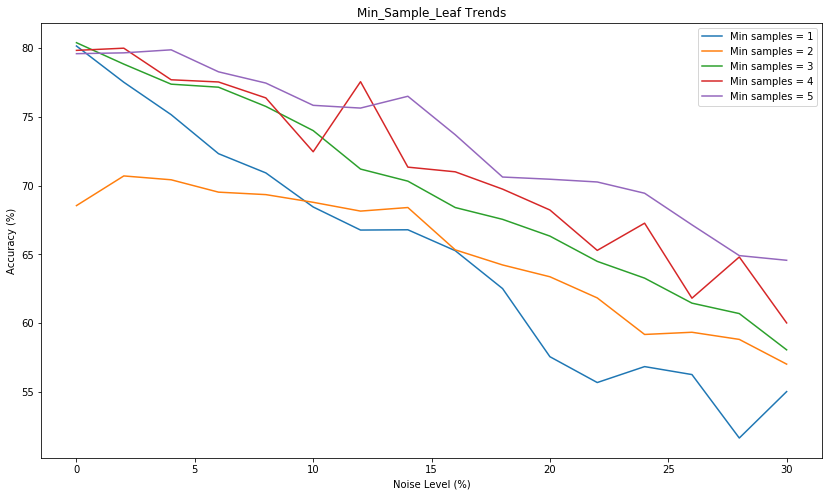

In [25]:
change_min_samples(min_samples_end=5, n=100)

The above graph shows that increasing the value of minimum samples, improves the accuracy at each noise level, with each minimum sample level following the same negative correlation. The difference in accuracies is seen to increase as the amount of noise increases. This trend occurs because we are reducing overfitting by increasing the min_samples_leaf parameter, thus leading to a more robust decision tree.

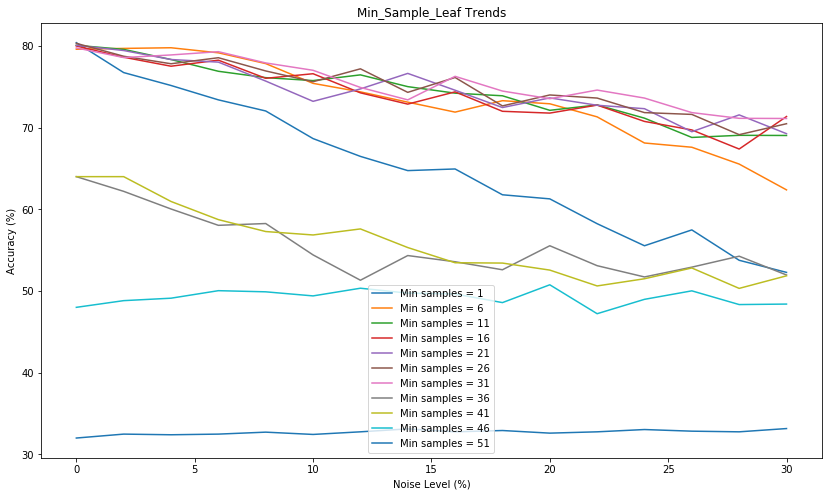

In [26]:
change_min_samples(min_samples_end=50, n=100, increase_samples=5)

Next I experimented by seeing what sort of effect very high values of min_sample_leaf would have on the accuracy. I first looked at every value between 1 and 50, in increments of 5. This showed to split the trends into groups. The best performing group had a value between 1 and 30 for min_samples_leaf. The values 1 and 6 started with a similar accuracy to the rest of the group but noticably dropped off alot faster when met with increased noise. A value of 1 started with an accuracy around 80% but ends with an acccuracy close to 50% at the maximum 30% noise level. This is close to where the second group finishes except they had values in the range 36-46 which shows that increasing the value of min_samples_leaf does not always lead to improved accuracy. There is a threshold, which once past, leads to poorer results as underfitting is occurring as the classifier needs too high a minimum number of samples to make a decision. For our data set it appears this threshold is between 31 and 36. Then there is the worse performing value of 51 which is significantly lower than every other line with the accuracy level never getting out of the low thirties, which is a level that makes the decision tree classifier redundant.